# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

# Reading the Dataset of Emails

In [ ]:
emails = pd.read_csv('/content/drive/MyDrive/AI N Ml Stuff/spam.csv',encoding='latin-1')

In [ ]:
emails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
emails.shape

(5572, 5)

# Missing Values

In [ ]:
print('missing values:', emails.isnull().sum())

missing values: v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


# Dropping columns with Missing values

In [ ]:
emails.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1 , inplace=True)

In [ ]:
emails

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Shuffling the emails to avoid Bias

In [ ]:
emails = shuffle(emails,random_state = 22)

In [ ]:
emails.head(10)

,v1,v2
3194,ham,Great. P diddy is my neighbor and comes for to...
5064,ham,But your brother transfered only &lt;#&gt; +...
2494,ham,You at mu? You should try to figure out how mu...
1015,ham,"Dear,regret i cudnt pick call.drove down frm c..."
1272,ham,Ok...
2136,ham,Well done and ! luv ya all
3985,ham,"Friendship is not a game to play, It is not a ..."
3830,ham,Let's pool our money together and buy a bunch ...
4207,ham,Or i go home first lar Ì_ wait 4 me lor.. I pu...
494,ham,Are you free now?can i call now?


In [ ]:
emails['v1'] = emails['v1'].map({'ham':0,'spam':1})

In [ ]:
emails.head(7)

,v1,v2
3194,0,Great. P diddy is my neighbor and comes for to...
5064,0,But your brother transfered only &lt;#&gt; +...
2494,0,You at mu? You should try to figure out how mu...
1015,0,"Dear,regret i cudnt pick call.drove down frm c..."
1272,0,Ok...
2136,0,Well done and ! luv ya all
3985,0,"Friendship is not a game to play, It is not a ..."


# Spam and not spam emails

In [ ]:
emails['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

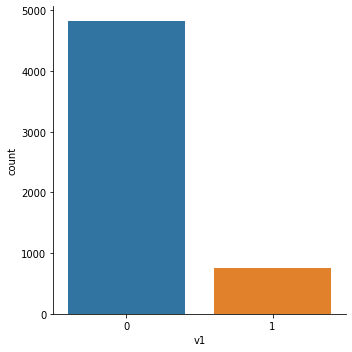

In [ ]:
sns.catplot(x="v1", kind="count", data=emails)

# Changing words 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
CV = CountVectorizer(min_df=1, stop_words="english",lowercase="True")

In [ ]:
X = emails['v2']
Y = emails['v1']

In [ ]:
X = CV.fit_transform(X)

# Splitting Data to training anf testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
x_train.shape, x_test.shape

((4457, 8404), (1115, 8404))

# Importing K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
score = cross_val_score(knn,x_train,y_train, scoring="r2", cv=10)

In [ ]:
score.mean()

0.3180696775801047

In [ ]:
score1=cross_val_score(knn, x_test, y_test, scoring="r2",cv=10)

In [ ]:
knn.score(x_test,y_test)

0.9300448430493273

In [ ]:
import pickle

In [ ]:
pickle.dump(knn,open("spam.pkl","wb"))
pickle.dump(CV,open("vectorizer.pkl","wb"))

In [ ]:
clf_knn = pickle.load(open("spam.pkl","rb"))
msg = "@the $thd"
data = [msg]
vect = CV.transform(data).toarray()
result = knn.predict(vect)

In [ ]:
print(result)

[0]
